##Github

https://github.com/Aidanjm13/USAccidentsDataAnalysis

To run this code simply put it in your Google Drive and open it using Google Colaboratory. You can then go through and click the play button on the cells to run it yourself.

##Purpose

The purpose of this document is to act as a walkthrough of the data science process, including Business Understanding, Data Understanding, Data Preparation, Modeling and Evaluating, and Deployment. To do this we will attempt to predict traffic accident severity using a dataset of information on traffic accidents, which was aggregated from a few different sources, including "US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks" (Moosavi et al.).

##Business Understanding

###About the Dataset
Looking at the Kaggle site for the dataset (3), we can see that the data was collected from February 2016 through March 2023 from the United States, in real time, using multiple traffic APIs. Because the data was collected in real time, the description mentions that network connectivity issues on certain days may create gaps in the data for some features, which should therefore be checked for in the Data Understanding stage and managed in the Data Preparation stage. Also mentioned is that the dataset includes data from 49 of the US states, and contains 7.7 million entries. This should be sufficient to draw some conclusions about accident patterns in the US, but we should be careful about generalizing beyond the US.

###Goals
The National Highway Traffic Safety Administration estimates that there were 39,345 traffic fatalities in 2024 (4). Traffic fatalities are a leading cause of death in the US, which means any increase in our ability to prevent or quickly react to them could have a large impact. Being able to predict the severity of accidents in different areas, at different times of the day, or during different weather conditions could help inform which areas to monitor more closely for accidents in order to prevent fatalities, and being able to predict the severity of accidents in real time directly after they occur could lead to a faster response time to accidents. Given the wide range of features collected to describe each accident, the goal is to select a subset of these, possibly along with derived features, then to train a model to predict the severity of accidents.

## Data Import

The data first needs to be added in order to be analyzed. The raw data is from Kaggle by Sobhan Moosavi at this link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download. To do this, the data is downloaded from our Github repository linked above as a .zip file, which then has the .csv file extracted to be used. This may take a few minutes due to the large size of the dataset.

In [ ]:
import zipfile
!wget -O archive.zip "https://github.com/Aidanjm13/USAccidentsDataAnalysis/raw/main/archive.zip"
with zipfile.ZipFile("archive.zip", "r") as zip_file:
    zip_file.extractall("US_Accidents_Data")

--2025-12-12 02:08:05--  https://github.com/Aidanjm13/USAccidentsDataAnalysis/raw/main/archive.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Aidanjm13/USAccidentsDataAnalysis/main/archive.zip [following]
--2025-12-12 02:08:05--  https://media.githubusercontent.com/media/Aidanjm13/USAccidentsDataAnalysis/main/archive.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684855912 (653M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 653.13M  24.6MB/s    in 27s     

2025-12-12 02:08:33 (24.1 MB/s) - ‘archive.zip’ saved [684855912/6

The data is then added to a Pandas dataframe to be able to be better analyzed through Python programming.  We did not end up loading all of the columns of the dataset as the data set is extremely large. More could potentially be done with more of the data, however we are limited by Google Colab's limitations.

In [ ]:
import pandas as pd

cols = ["Severity", "Start_Time", "End_Time", "Distance(mi)", "State", "Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)","Weather_Condition","Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop","Civil_Twilight"] # the dataset columns that will be loaded

accidentsDF = pd.read_csv("/content/US_Accidents_Data/US_Accidents_March23.csv", usecols=cols)

## Data Understanding

In order to get an understanding of the data we are looking at the Pandas .head() function can be used to see the first few entries in the dataframe. This gives us insight into the data types for each feature.

In [ ]:
accidentsDF.head()

,Severity,Start_Time,End_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.9,NaN,91.0,29.68,10.0,...,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.9,NaN,100.0,29.65,10.0,...,False,False,False,False,False,False,False,False,False,Night
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,OH,36.0,33.3,100.0,29.67,10.0,...,False,False,False,False,False,False,False,True,False,Night
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,OH,35.1,31.0,96.0,29.64,9.0,...,False,False,False,False,False,False,False,False,False,Day
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,OH,36.0,33.3,89.0,29.65,6.0,...,False,False,False,False,False,False,False,True,False,Day


The .info() function can be used to tell us further information about the dataset such as the shape of the dataset and the datatypes of the features.

In [ ]:
accidentsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Distance(mi)       float64
 4   State              object 
 5   Temperature(F)     float64
 6   Wind_Chill(F)      float64
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Visibility(mi)     float64
 10  Wind_Speed(mph)    float64
 11  Precipitation(in)  float64
 12  Weather_Condition  object 
 13  Amenity            bool   
 14  Bump               bool   
 15  Crossing           bool   
 16  Give_Way           bool   
 17  Junction           bool   
 18  No_Exit            bool   
 19  Railway            bool   
 20  Roundabout         bool   
 21  Station            bool   
 22  Stop               bool   
 23  Traffic_Calming    bool   
 24  Traffic_Signal     bool   
 25  Turning_Loop      

We can now see that we selected 27 features to analyze from this dataset and there are a total of 7,728,394 instances of accidents. We can also easily see the datatype that pandas is storing it as.

It is also important to look at potential missing data within the dataframe to help inform us on what to do within our dataset.

In [ ]:
accidentsDF.isnull().sum()

,0
Severity,0
Start_Time,0
End_Time,0
Distance(mi),0
State,0
Temperature(F),163853
Wind_Chill(F),1999019
Humidity(%),174144
Pressure(in),140679
Visibility(mi),177098


Here we can see that there are a few features with missing data. Depending on the extent of the missing data in a specific feature we will decide whether to remove the column/feature, remove the row/instance, or place in a different value for analysis. And while it may appear that there is a lot of missing data for some of the features it is important to remember that the dataset has millions of instances and that some can be removed.

###Feature Analysis
The following section will be looking at each feature individually to look into its meaning, datatype, and any potential issues with the feature.

####ID
The dataset initially included an ID, this was excluded as they were arbitrary and Pandas will add their own IDs anyway,

####Source

The dataset also included a source feature usually Source1 or Source2. The two sources were MapQuest and Bing. For the purposes of this analysis, we excluded this feature as no insight would be acquired from the source as long as both sources were deemed reliable and included the features in the same format.

####Severity

The severity of the accident is on an integer scale from 1 to 4. 1 is considered the least severe while 4 is the greated severity. The datatype is ordinal as while we can understand an order of values, we do not fully know the difference between these severities. These will be the four classifications that we will be looking into how the other features relate to the severity of an accident. As such we will be using models for supervised classification.

####Start_Time and End_Time

These two features relate to the start time and end time of the accident. The data is stored as an object that represents the time, it may be important to simplify the datatype for the model into simply being the time of day on a 24 hour numeral scale instead of including the full date. These features on their own may be important as they give us insight into how accidents may be more likely to occur based on how early or late it is. We could also derive a new simple feature being the length of the accident based on the difference between these times, as intuitively a longer accident would could increase an accident's severity. This data is based on the local time so timezones would not need to be considered by the model.

####Start_Lat, Start_Lng, End_Lat, End_Lng, Street, City, County, State, Zipcode, Country, Timezone

All of these features describes the location of the accident, this leads to the question on which features to include as we will be attempting to use models and it may be difficult for it to understand certain features. We will not be using End_Lat or End_Lng as a majority of that data was missing. It is furthermore difficult to include the categorical data of street, city, county, as there are many of them which would require further processing such as one hot encoding which would likely lead to too many features. Furthermore Country and Timezone wouldn't tell the model much as all of the data is from the US and there are only three timezones. This leaves us with Start_Lat, Start_Lng State, and Zipcode. These are both numerical values so they could easily be used with a model. The coordinate system would give a more precise location, but the model would not understand the coordinate system very well. The zipcodes are also more categorical and could be more easily used for tree models even though we lose some specific information. Another issue is that the model may not understand zipcodes and would likely treat the numbers as one being larger than the other instead of being categorical. There is also an issue of many missing longitude, latitude, and zipcodes which makes it hard to use. This leaves location as being an issue when we consider analyzing the data and building a model off of it. We may attempt to use the state as a categorical variable using one hot encoding but with it being a large location we also expect there too not be any major coorelations although we may see some in more populated states such as California or New York.

####Distance (mi)

This is the length of the road that was affected by the accident. This is a floating point ratio datatype. We can intuitively begin to speculate that if an accident caused a longer length of the road to be shut down then it was probably a more severe accident. Longer affected distances may also indicate multi-vehicle accidents that require extended cleanup and management

####Description

The dataset originally included human written text descriptions of the accidents collected. This was chosen not to be included as it would require text analysis most likely with a large language model, and that was determined to be beyond the scope of this project. It was also contributing to a much large dataset size as it included much more text.

####Airpot_Code, Weather_Timestamp

These two features relate to the nearby airport with a weather station and when the weather observation took place. These features will not be included as we will assume the weather related observations to be consistent with what existed at the accident.

####Temperature(F)

This is the temperature that it was outside at the time of the accident as a floating point number with 1 decimal. This can be considered an interval data type as the fahrenheit scale does not have a true zero. We could easily understand how temperature could relate to accident severity as colder temperatures could lead to higher likelyhood of events such as ice or fogging.

####Wind_Chill(F)

This datatype represents the wind chill, however looking at the amount of missing data points it will be required to remove this feature from analysis. It is also unlikely that wind chill makes an intense difference compared to temperature.

####Humidity(%)

This feature is the humidity as a floating point number which represents a percentage. This is a ratio datatype as it does have a true zero. Humidity could potentially effect the vehicle, the driver, or the weather which could lead to a difference in accident severity. While there are many missing data points, we can likely remove those rows instead of the feature as a whole since we have a lot of data.

####Pressure(in)

This feature is the pressure in inches of mercury. It is stored as a floating point number and is nominal. Air pressure can indicate weather conditions which could effect driving conditions. While there are many missing data points, we can likely remove those rows instead of the feature as a whole since we have a lot of data.

####Visibility(mi)

This is how far the visibility was in miles. This is a ratio data point and is stored as a floating point number. If there is less visibility then drivers are more likely to drive poorly and get in worse accidents. While there are many missing data points, we can likely remove those rows instead of the feature as a whole since we have a lot of data. Visibility can also interact with other features like weather or time of day, heightening accident risks under certain conditions.

####Wind_Direction

This feature was not included as we did not believe that the wind direction would have a large bearing on accident severity. It would also be difficult to utilize as another categorical variable.

####Wind_Speed(mph)

This feature includes the wind speed as a ratio floating point number. This feature seems important as high wind speeds could directly influence driving capabilities. Unfortunately there is about 500,000 missing data points. After removing the other from the other features we will see how many more missing data points there are. If we then determine that there are too many to remove we will use a summary statistic such as the median to fill in those unknown values.

####Precipitation(in)

This is the number of inches of rainfall as a ratio floating point number. Higher amounts of rainfall would lead to more treacherous weather conditions. There are a large number of unknown values in our dataset for this, however based on the description we will take it to understand that an unknown value means that there was no precipitation. We can therefore use this very important feature when it comes to accidents.  

####Weather_Condition

This is a categorical variable of a weather condition such as Clear,Snow,Rain,etc. Unfortunately we will not be able to use this for our analysis as there are over 4 million different categories which would make difficult to work through. We hope that the other weather based features such as visibility, temperature, and precipitation will be able to cover the loss of this feature.

####Amenity

This is a categorical True or False variable of whether there is an amenity nearby such as a restaurant, park, or other venue. These areas could be more crowded which could cause more accidents. Including this variable helps capture how human activity and local attractions may influence traffic patterns.

####Bump

This is a categorical True or False variable of whether there is a speed bumb nearby. Speed bumbs could prevent extreme accidents as they would ideally be moving slower.  Still, they may also create sudden braking or stop-and-go behavior which has the potential to influence minor accident frequency

####Crossing

This is a categorical True or False variable of whether there is any sort of crossing for pedestrians, animals, cyclists, etc. This could either cause more severe accidents because of hitting pedestrians or potentially cause drivers to be more cautious. Crossing can also impact traffic flow by introducing frequent stopping and/or reduced speeds, which have the potential to infleuce accident patterns.

####Give_Way

This is a categorical True or False variable of whether there is some sort of priority passing sign on the road. This system of priority could lead to assumptions between drivers and mistakes as opposed to stop signs or lights. It may also affect driver behavior by encouraging rolling yields, stops, or hesitaitons which can all influece accident likelihood.

####Junction

This is a categorical True or False variable of whether there is a highway ramp, exit, or entrance. Highway merging could be a source of sever accidents, as these areas create complex traffic interactions where speed differences and lane changing can contribute to collision risk.

####No_Exit

This is a categorical True or False variable of whether there is no possibility for transport to continue down a path. This could lead to accidents although maybe not severe ones with individuals having to make U-turns. Dead-end areas can also create unexpected stopping behavior or confusion for drivers unfamiliar with the area, which may lead to minor collisions.

####Railway

This is a categorical True or False variable of whether there is an railway nearby. Accidents with trains would cause more severe accidents, but the presence of the railroad could slow down most drivers similar to a speed bump. Additionally, potential other factors may include the sight and sound of oncoming trains. Drivers may behave unpredictably, like speeding up to beat the crossing or braking abruptly.

####Roundabout

This is a categorical True or False variable of whether there is an roundabout nearby. The system of a roundabout requires drivers to be very focused and relies on a lot of autonomy which could lead to severe accidents that would clog the roundabout as well. Roundabouts can also improve traffic flow through reducing stop-and-go behavior, but have the potential to increase minor collision risk due to confusion or midjudged yeild.

####Station

This is a categorical True or False variable of whether there is a public transportation station nearby. Slow moving vehicles such as buses which would stop inconveniently for many drivers could lead to reckless drivers trying to get around the bus and cause an accident. As well, the high pedestrian traffic nature of stations may increase the risk of colliding with people crossing the road.

####Stop

This is a categorical True or False variable of whether there is a stop sign. Ideally the presence of a stop sign would prevent accidents as it would cause drivers to manage the flow of traffic, but it could also be a source of issue if there needs to be a more structured system. For instance, drivers who fail to anticipate/notice stop signs are likely to break suddenly, potentially leading to minor/rear end collisions.

####Traffic Calming

This is a categorical True or False variable of whether there is some method of slowing down traffic speed such as flashing speed limit detectors. This should reduce accidents as drivers would slow down and be more cautious.

####Traffic Signal

This is a categorical True or False variable of whether there is a Traffic signal like a stop light. These stop lights should control the flow of traffic to prevent accidents but there is also a higher number of cars moving at these junctions that could cause more accidents to occur.

####Turning Loop

This is a categorical True or False variable of whether there is a wide area on a highway for drivers to turn around. The ability for drivers to turn around on a highway could lead to added accidents with merging with the flow of traffic.

####Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical-Twilight

These features all relate to the same idea of whether it was day or night with differing ways of determining between the two. For the purposes of this analysis we only used the Civil_Twilight feature as this describes the ability for the driver to see if it was day or night. This would effect the visibility of the driver, and you may expect more accidents as night as the driver may not see details as well. This is a categorical variable with day or night.

##Data Preparation and Transformations

###Removing Features

In the code below we remove the features that we deemed unusable due to too much missing data or difficult to manage datatypes.

In [ ]:
accidentsDF = accidentsDF.drop('Wind_Chill(F)', axis=1) #removing wind chill feature
accidentsDF = accidentsDF.drop('Weather_Condition', axis=1) #removing weather condition feature

###Removing Instances

This code goes through the features that had some missing values and removes the instances that were missing that data.

In [ ]:
accidentsDF = accidentsDF.dropna(subset = ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Civil_Twilight'])

After those rows were dropped we can now check to see the size of the dataframe and number of missing values as we did previously.

In [ ]:
accidentsDF.info()
accidentsDF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7487604 entries, 0 to 7728393
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Distance(mi)       float64
 4   State              object 
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Amenity            bool   
 12  Bump               bool   
 13  Crossing           bool   
 14  Give_Way           bool   
 15  Junction           bool   
 16  No_Exit            bool   
 17  Railway            bool   
 18  Roundabout         bool   
 19  Station            bool   
 20  Stop               bool   
 21  Traffic_Calming    bool   
 22  Traffic_Signal     bool   
 23  Turning_Loop       bool   
 24  Civil_Twilight     object 
dtypes: bool(13), float64(7)

,0
Severity,0
Start_Time,0
End_Time,0
Distance(mi),0
State,0
Temperature(F),0
Humidity(%),0
Pressure(in),0
Visibility(mi),0
Wind_Speed(mph),411839


We can now see that there are still about 7.5 million entries, meaning that we can most likely afford to drop the rows with Wind_speed missing as well and keep that as a usable feature.

In [ ]:
accidentsDF = accidentsDF.dropna(subset = ['Wind_Speed(mph)'])

###Adjusting Unknown Values

As we could see previously there are also many missing values in precipitation, we were making the assumption that a missing value meant a lack of rainfall, so we are going to fill in those missing values with 0.0.

In [ ]:
accidentsDF['Precipitation(in)'] = accidentsDF['Precipitation(in)'].fillna(0.0)

We can now see that there are no missing values in our dataset.

In [ ]:
accidentsDF.isnull().sum()

,0
Severity,0
Start_Time,0
End_Time,0
Distance(mi),0
State,0
Temperature(F),0
Humidity(%),0
Pressure(in),0
Visibility(mi),0
Wind_Speed(mph),0


###Transforming Feature Datatypes

As discussed in our the data understandin section there are some datatypes that will be difficult for model analysis. The first being the date time object for start time and end time. This value is going to be adjusted to be a integer value that represents the minute of the day based on a 24 hour scale, so midnight would be 0 and 11:59 pm would be 1439. This change is shown in the code below.

In [ ]:
#adjusting Start Time
accidentsDF['Start_Time'] = pd.to_datetime(accidentsDF['Start_Time'], format = 'mixed')
accidentsDF['Start_Time'] = accidentsDF['Start_Time'].dt.hour * 60 + accidentsDF['Start_Time'].dt.minute
#adjusting Start Time
accidentsDF['End_Time'] = pd.to_datetime(accidentsDF['End_Time'], format = 'mixed')
accidentsDF['End_Time'] = accidentsDF['End_Time'].dt.hour * 60 + accidentsDF['End_Time'].dt.minute

It is also important that we change the boolean values of True and False and Day and Night to 1s and 0s respectively.

In [ ]:
accidentsDF['Amenity'] = accidentsDF['Amenity'].replace({True: 1, False: 0})
accidentsDF['Bump'] = accidentsDF['Bump'].replace({True: 1, False: 0})
accidentsDF['Crossing'] = accidentsDF['Crossing'].replace({True: 1, False: 0})
accidentsDF['Give_Way'] = accidentsDF['Give_Way'].replace({True: 1, False: 0})
accidentsDF['Junction'] = accidentsDF['Junction'].replace({True: 1, False: 0})
accidentsDF['No_Exit'] = accidentsDF['No_Exit'].replace({True: 1, False: 0})
accidentsDF['Railway'] = accidentsDF['Railway'].replace({True: 1, False: 0})
accidentsDF['Roundabout'] = accidentsDF['Roundabout'].replace({True: 1, False: 0})
accidentsDF['Station'] = accidentsDF['Station'].replace({True: 1, False: 0})
accidentsDF['Stop'] = accidentsDF['Stop'].replace({True: 1, False: 0})
accidentsDF['Traffic_Calming'] = accidentsDF['Traffic_Calming'].replace({True: 1, False: 0})
accidentsDF['Traffic_Signal'] = accidentsDF['Traffic_Signal'].replace({True: 1, False: 0})
accidentsDF['Turning_Loop'] = accidentsDF['Turning_Loop'].replace({True: 1, False: 0})
accidentsDF['Civil_Twilight'] = accidentsDF['Civil_Twilight'].replace({'Day': 1, 'Night': 0})

/tmp/ipython-input-1107358148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  accidentsDF['Amenity'] = accidentsDF['Amenity'].replace({True: 1, False: 0})
/tmp/ipython-input-1107358148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  accidentsDF['Bump'] = accidentsDF['Bump'].replace({True: 1, False: 0})
/tmp/ipython-input-1107358148.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

Finally as discussed previously we will be using State for a generally categorical location. In order to allow models to understand this we will need to use one hot encoding to prevent the model from attempting to compare the locations in a numerical sense that is not desired. This is shown in the code below.

In [ ]:
accidentsDF = pd.get_dummies(accidentsDF, columns=['State'], dtype=int)

We can then ensure that it all worked by looking at the dataframe head and info.

In [ ]:
accidentsDF.head()

,Severity,Start_Time,End_Time,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
2,2,409,439,0.01,36.0,100.0,29.67,10.0,3.5,0.00,...,0,0,0,0,0,0,0,0,0,0
3,3,443,473,0.01,35.1,96.0,29.64,9.0,4.6,0.00,...,0,0,0,0,0,0,0,0,0,0
4,2,459,489,0.01,36.0,89.0,29.65,6.0,3.5,0.00,...,0,0,0,0,0,0,0,0,0,0
5,3,464,494,0.01,37.9,97.0,29.63,7.0,3.5,0.03,...,0,0,0,0,0,0,0,0,0,0
6,2,479,509,0.00,34.0,100.0,29.66,7.0,3.5,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
accidentsDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7075765 entries, 2 to 7728393
Data columns (total 73 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         int64  
 2   End_Time           int64  
 3   Distance(mi)       float64
 4   Temperature(F)     float64
 5   Humidity(%)        float64
 6   Pressure(in)       float64
 7   Visibility(mi)     float64
 8   Wind_Speed(mph)    float64
 9   Precipitation(in)  float64
 10  Amenity            int64  
 11  Bump               int64  
 12  Crossing           int64  
 13  Give_Way           int64  
 14  Junction           int64  
 15  No_Exit            int64  
 16  Railway            int64  
 17  Roundabout         int64  
 18  Station            int64  
 19  Stop               int64  
 20  Traffic_Calming    int64  
 21  Traffic_Signal     int64  
 22  Turning_Loop       int64  
 23  Civil_Twilight     int64  
 24  State_AL           int64  
 25  State_AR           int6

We can now see that all of the data types are numerical which will be easy for models to work with.

###Creating Derived Feature

We can create derived features from our data which could potentially allow the model to understand more about the accident. One example of this from our dataset would be the length of an accident. Instead of just giving the model a start and end time, we can derive an attribute of how long the accident lasted. The code for this is shown below.

In [ ]:
accidentsDF['Accident_Length'] = accidentsDF['End_Time'] - accidentsDF['Start_Time']
accidentsDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7075765 entries, 2 to 7728393
Data columns (total 74 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         int64  
 2   End_Time           int64  
 3   Distance(mi)       float64
 4   Temperature(F)     float64
 5   Humidity(%)        float64
 6   Pressure(in)       float64
 7   Visibility(mi)     float64
 8   Wind_Speed(mph)    float64
 9   Precipitation(in)  float64
 10  Amenity            int64  
 11  Bump               int64  
 12  Crossing           int64  
 13  Give_Way           int64  
 14  Junction           int64  
 15  No_Exit            int64  
 16  Railway            int64  
 17  Roundabout         int64  
 18  Station            int64  
 19  Stop               int64  
 20  Traffic_Calming    int64  
 21  Traffic_Signal     int64  
 22  Turning_Loop       int64  
 23  Civil_Twilight     int64  
 24  State_AL           int64  
 25  State_AR           int6

##Summary Statistics

### Summary Statistics

Now that the data has been cleaned and transformed, we can look at basic summary statistics.  
The goal of this section is to understand how the key numeric features behave overall and how they differ across accident severity levels.

We start by looking at the distribution of the target variable `Severity` and then examine summary statistics for the main numeric features (distance, temperature, visibility, wind speed, precipitation, and accident length).  
We also look at how some of these features differ by severity class.

Accident counts by severity:
Severity
1      65268
2    5691811
3    1139075
4     179611
Name: count, dtype: int64


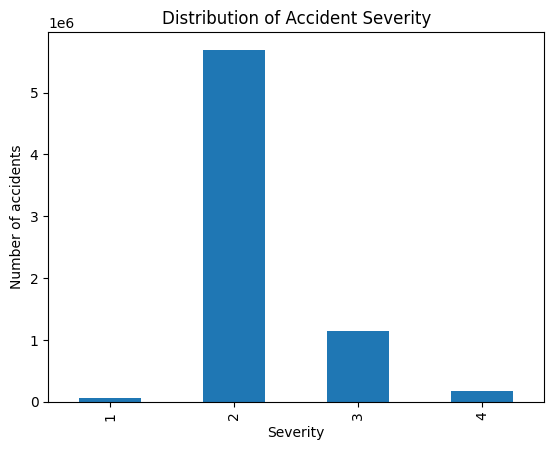

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Length
count,7.075765e+06,7.075765e+06,7.075765e+06,7.075765e+06,7.075765e+06,7.075765e+06,7.075765e+06,7.075765e+06
mean,5.690153e-01,6.187263e+01,6.440409e+01,2.951331e+01,9.107955e+00,7.689434e+00,5.897033e-03,4.243737e+01
std,1.764152e+00,1.904630e+01,2.276643e+01,1.016474e+00,2.640589e+00,5.412705e+00,7.475428e-02,2.847270e+02
min,0.000000e+00,-4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.435000e+03
25%,0.000000e+00,4.900000e+01,4.800000e+01,2.934000e+01,1.000000e+01,4.600000e+00,0.000000e+00,3.000000e+01
50%,3.700000e-02,6.400000e+01,6.600000e+01,2.984000e+01,1.000000e+01,7.000000e+00,0.000000e+00,6.400000e+01
75%,4.800000e-01,7.600000e+01,8.400000e+01,3.002000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.200000e+02
max,4.417500e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,1.439000e+03


In [ ]:
import matplotlib.pyplot as plt

# Distribution of severity
severity_counts = accidentsDF['Severity'].value_counts().sort_index()
print("Accident counts by severity:")
print(severity_counts)

# Plot severity distribution
plt.figure()
severity_counts.plot(kind='bar')
plt.xlabel("Severity")
plt.ylabel("Number of accidents")
plt.title("Distribution of Accident Severity")
plt.show()

# Summary stats for key numeric variables
numeric_cols = [
    "Distance(mi)",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Accident_Length"
]

accidentsDF[numeric_cols].describe()


The table from `describe()` gives us the mean, standard deviation, and range for each feature.  
For example, we can see typical accident distances, average temperatures, and how much visibility or wind speed varies across all crashes.

To connect these features to accident severity, we can also compute group statistics by severity.


In [ ]:
# Mean values of selected features by severity
grouped_means = accidentsDF.groupby("Severity")[numeric_cols].mean()
grouped_means


,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Length
Severity,,,,,,,,
1,0.114697,72.458650,61.864007,29.199274,9.483449,7.179362,0.004889,39.409910
2,0.573396,61.724058,64.310191,29.494763,9.102289,7.570017,0.005399,43.659713
3,0.427674,62.554816,64.671636,29.647579,9.118594,8.320470,0.008572,40.254344
4,1.491656,58.407641,66.605848,29.363509,9.083581,7.657090,0.005078,18.646247


When we look at the grouped means, we can describe patterns, such as:

- Whether more severe accidents tend to have **longer accident lengths** or **longer affected road distances**.
- Whether higher severity accidents occur on average with **lower visibility** or **higher precipitation**.
- Any temperature or humidity patterns that stand out for the most severe crashes.


##Data Modeling

###Train Test Split

Our prediction problem is a **multiclass classification** task:

- **Target (y)**: `Severity` (values 1, 2, 3, 4).
- **Features (X)**: all the other numeric columns, including weather conditions, time of day, road environment, and state dummies.

Because the dataset is very large, we work with a random sample of the data for model training. This keeps runtime and memory usage reasonable in Google Colab while still giving us a large number of examples to learn from.


In [ ]:
from sklearn.model_selection import train_test_split

#take a random sample for modeling to reduce runtime
sample_size = 200_000   # you can adjust up or down if Colab struggles
sample_df = accidentsDF.sample(n=sample_size, random_state=42)

X = sample_df.drop("Severity", axis=1)
y = sample_df["Severity"]

#train / test split with stratification to keep severity proportions similar
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape


((160000, 73), (40000, 73))

### Multiclass Logistic Regression

Logistic regression is a linear model that tries to learn a weighted combination of the features to predict the probability of each severity class. It is a good baseline because it is relatively simple and easy to interpret.

Logistic regression works best when features are on similar scales, so we standardize the input features before training.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#set model parameters
log_reg = LogisticRegression(
    max_iter=200,
    solver='saga',
    random_state=42,
    n_jobs=-1
)

#train model
log_reg.fit(X_train_scaled, y_train)
#test model
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       378
           2       0.81      0.99      0.89     32177
           3       0.49      0.04      0.08      6435
           4       0.45      0.00      0.01      1010

    accuracy                           0.80     40000
   macro avg       0.44      0.26      0.24     40000
weighted avg       0.74      0.80      0.73     40000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use

The logistic regression model reached an overall accuracy of 80 percent, but the class-by-class results show that the model is heavily biased toward predicting severity 2 accidents. The precision, recall, and F1 score for severity 2 are all very strong, which makes sense because it is by far the most common class in the dataset. However, the model performs poorly on the other severity levels. Severity 1 and 4 have recall values of zero, meaning the model did not correctly identify any examples of those classes. Severity 3 also has extremely low recall, and the F1 scores for all three minority classes are close to zero. The macro averages make this clear, with an F1 score of only 0.24 despite the high overall accuracy. This shows that logistic regression struggles with the dataset’s imbalance and tends to default to the majority class. While it works as a baseline model, it is not effective for detecting more severe accidents, which are the cases where accurate prediction matters most.

A goal of making these models is to also work to understand the decisions it is making based on the features we give it. The code below works to explain the show the model's coefficients so that we can better understand it.

<Figure size 1400x700 with 0 Axes>

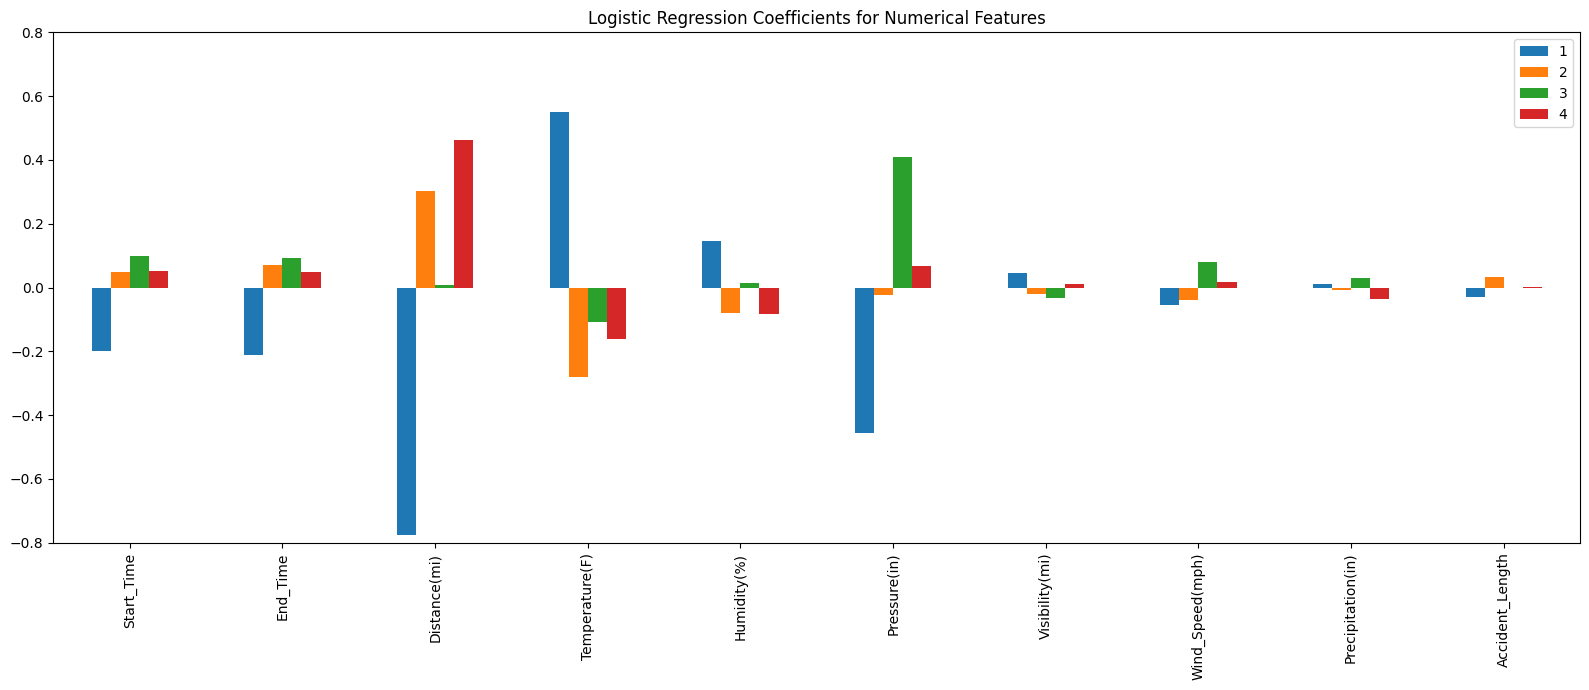

<Figure size 1400x700 with 0 Axes>

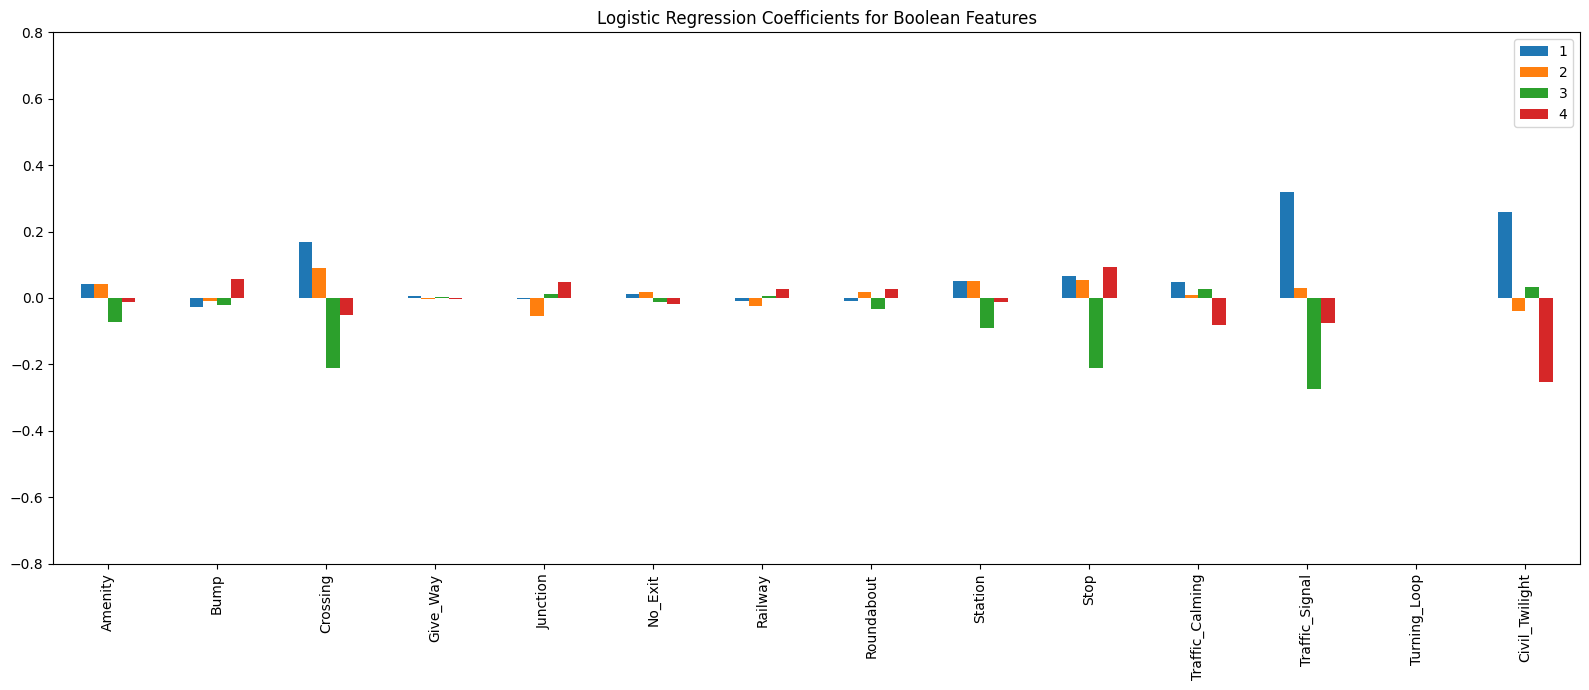

<Figure size 1400x700 with 0 Axes>

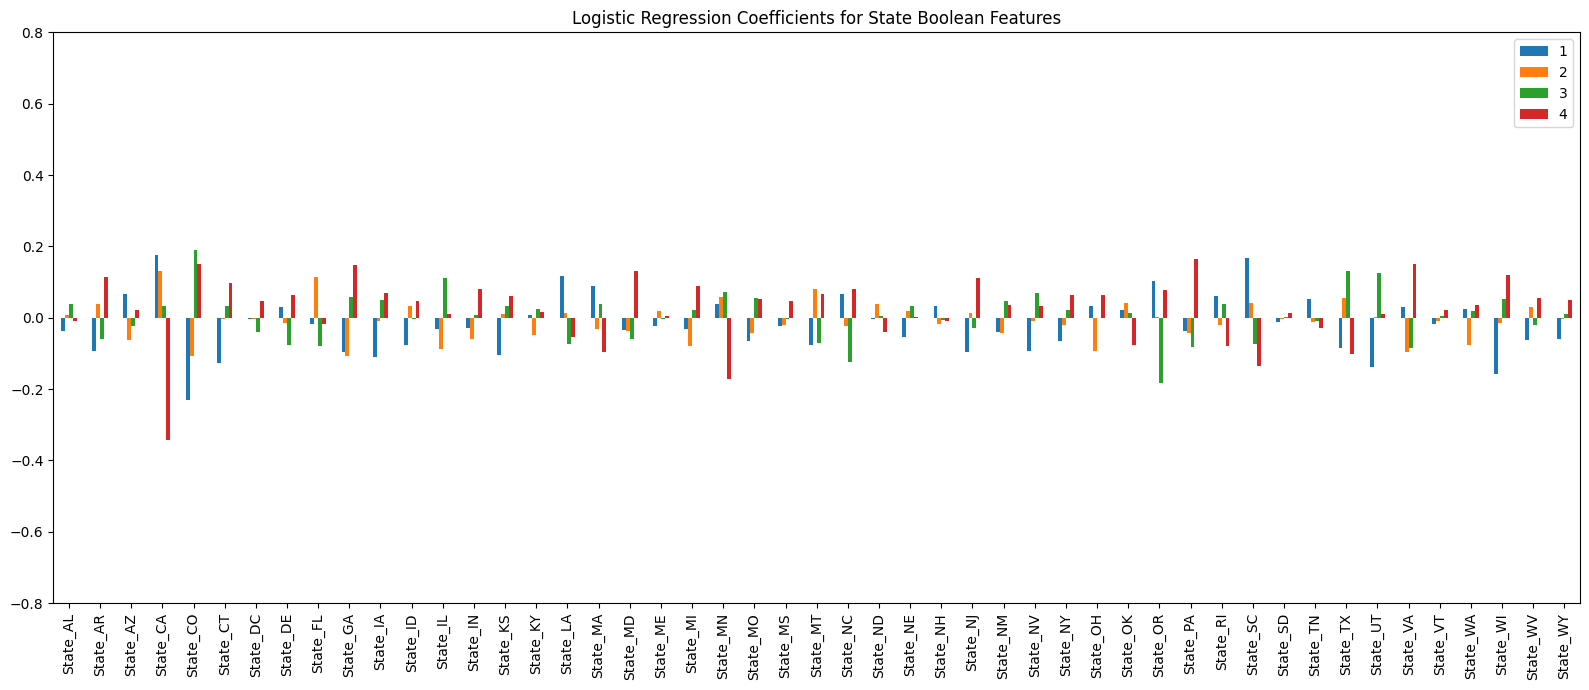

In [ ]:
coef_df = pd.DataFrame(
    log_reg.coef_,
    columns=X_train.columns,
    index=log_reg.classes_
)

#chart 1 numerical values
plt.figure(figsize=(14, 7))
coef_df[['Start_Time','End_Time','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Accident_Length']].T.plot(kind="bar", figsize=(16, 7))
plt.title("Logistic Regression Coefficients for Numerical Features to Determine Severity Rating")
plt.ylim(-0.8, 0.8)
plt.tight_layout()
plt.show()

#chart 2 boolean values
plt.figure(figsize=(14, 7))
coef_df[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Civil_Twilight']].T.plot(kind="bar", figsize=(16, 7))
plt.title("Logistic Regression Coefficients for Boolean Features to Determine Severity Rating")
plt.ylim(-0.8, 0.8)
plt.tight_layout()
plt.show()

#chart 3 states
plt.figure(figsize=(14, 7))
coef_df[['State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IL','State_IN','State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MI','State_MN','State_MO','State_MS','State_MT','State_NC','State_ND','State_NE','State_NH','State_NJ','State_NM','State_NV','State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA','State_WI','State_WV','State_WY']].T.plot(kind="bar", figsize=(16, 7))
plt.title("Logistic Regression Coefficients for State Boolean Features to Determine Severity Rating")
plt.ylim(-0.8, 0.8)
plt.tight_layout()
plt.show()

The three graphs above are separated based on the types of features with the top graph being the numerical features such as the time of day or amount of wind, the second graph being the general boolean features such as whether there was a stop sign or amenity, and the last graph being the state features. These graphs show us the coefficients that contribute to the decisions as to which classification the logistic regression placed it into. Based on these coefficients we can see some clear features that are could be contributing to a more severe accident. These graphs mean that as the bar is more positive that as the feature value increases it is more likely to be classified as that severity. If the bar is negative it means that a higher value will not be classified as that severity tier.

From the first graph we can see that distance, temperature, and pressure all are major factors that contribute to the severity. In distance we can see that a higher distance means that it is more likely a more severe accident. This makes sense as a bigger accident will close down more of the road. In temperature we see that a higher temperature leads to less sever accidents, this makes sense as lower temperatures causes ice and snow which would lead to worse accidents. Finally in the pressure feature we can see that higher pressure leads to higher severity, high pressure systems leads to more severe whether which would impact driving.

From the second graph we can see that the boolean features of crossing, stop, traffic signal, and civil twilight are most impactful. The presence of a pedestrial, cycling, or animal crossing actually leads to a lower severity accident, this is likely because people are more cautious here. This same trend holds with traffic signals as well. While this trend tends to help with stop signs, it appears that there is a chance for the worst severity accidents to happen at stop signs, this could happen when people aren't paying attention and run through stop signs. Finally, civil twilight shows that the worst accidents happen at night.

The last graph is of all of the states and what state the accident occurred in. In here we can see some trends such as there are less severe accidents in California, while more severe accidents in Pennsylvania. This could show the impact of road infrastructure where California has more straight larger roads than the twisty backend roads of much of rural Pennsylvania.

### Decision Tree

A decision tree classifier learns a set of if-then rules by splitting the data on features that best separate the severity classes.  
Trees can naturally handle non-linear relationships and interactions and do not need feature scaling.

We will limit the depth of the tree to prevent overfitting.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#setting decision tree model
tree_clf = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=100,
    random_state=42
)

#training model
tree_clf.fit(X_train, y_train)
#testing model
y_pred_tree = tree_clf.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.10      0.17       378
           2       0.83      0.96      0.89     32177
           3       0.55      0.21      0.31      6435
           4       0.41      0.08      0.13      1010

    accuracy                           0.81     40000
   macro avg       0.57      0.34      0.37     40000
weighted avg       0.77      0.81      0.77     40000



The decision tree model shows a slight improvement over logistic regression, but it still struggles with the minority severity classes. The overall accuracy is 81 percent, and the model continues to perform very well on severity 2 accidents, with high precision, recall, and an F1 score of 0.89. Unlike logistic regression, the decision tree is at least able to identify some cases of severity 1, 3, and 4, but the recall for those classes remains low. Severity 1 has a recall of 0.10, severity 3 reaches 0.21, and severity 4 has a recall of 0.08, which means the model still misses most of the more severe accidents. The macro-average F1 score of 0.37 reflects this imbalance in performance across classes. Even though the tree captures slightly more nuance than the linear model, it continues to be biased toward the dominant class in the dataset. This suggests that while decision trees can model nonlinear relationships, they still do not adequately address the class imbalance problem, especially for the more critical high-severity accidents.

One of the benefits of decision trees is that they are extremely explainable, as we can specifically look at the decisions it is making to split into binary child nodes. The following code works to show those decisions.

In [ ]:
features = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
features = features.sort_values(ascending=False)
print(features)

Distance(mi)       0.344309
Accident_Length    0.226514
Traffic_Signal     0.125619
Start_Time         0.033065
Crossing           0.032694
                     ...   
State_MS           0.000000
State_NV           0.000000
State_SD           0.000000
State_VT           0.000000
State_WY           0.000000
Length: 73, dtype: float64


The above code shows which features contributed to simplifying the tree size the most by splitting it up most effectively. The top features are similar to the ones that we described with the logistic regression model. Distance, traffic signal, and crossing for the same reasons as described previously. However, this model shows that accident length and start time play a role in the severity. Accident length can be understood as a longer accident that takes more time to clear with block traffic for longer and be considered more severe. Start time could show similar to the civil twilight that driving early in the morning or at night could lead to worse driving capabilities.

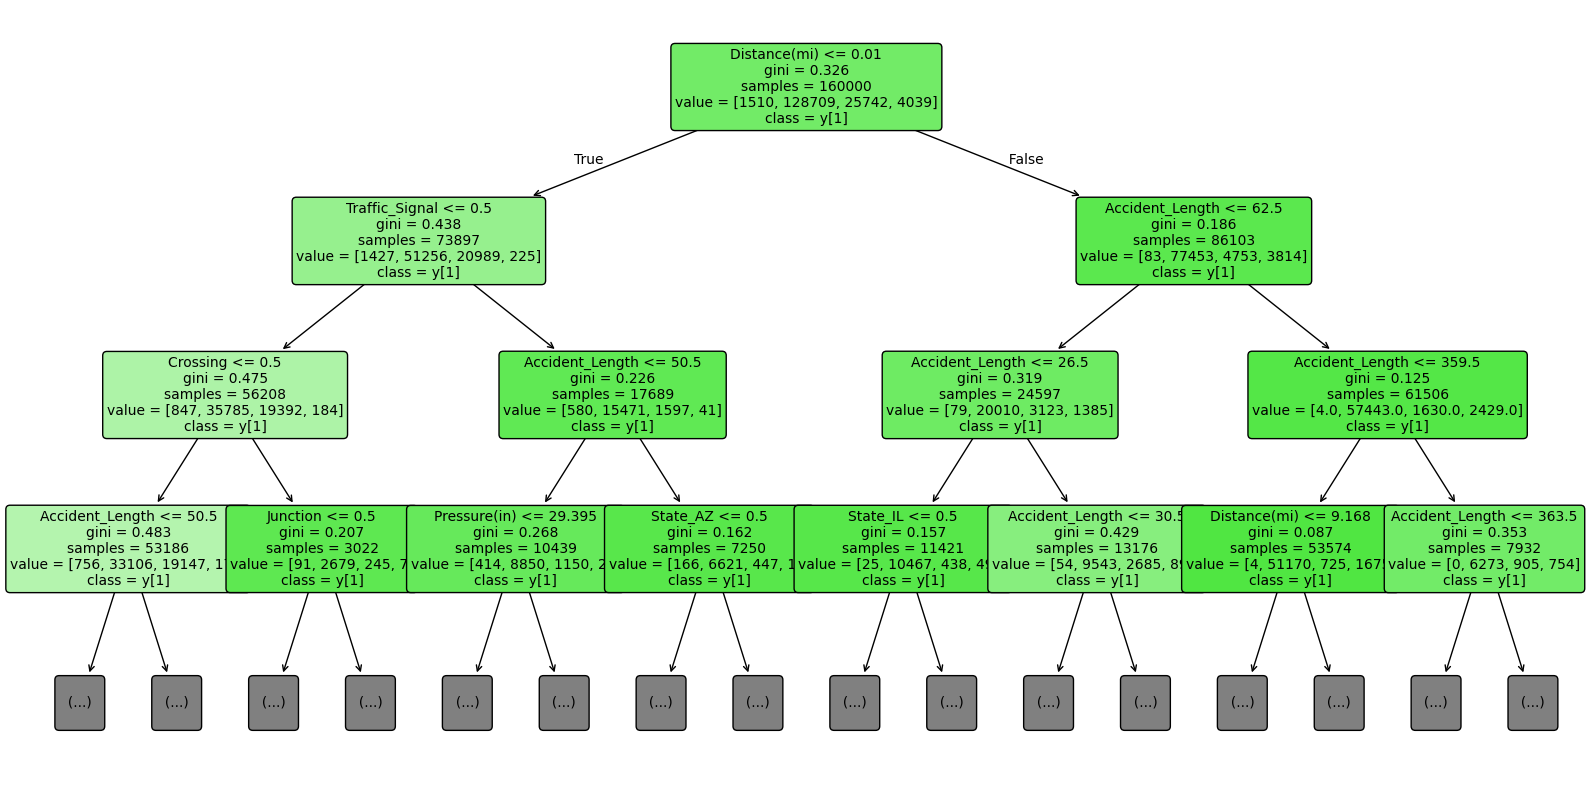

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=True, filled=True, rounded=True, fontsize=10, max_depth = 3)#can address depth and font size to be able to more easily see features on the tree
plt.show()

The above code allows us to visualize the decision tree, if desired you can increase the depth of the visualization to be able to understand the tree better and more niche choices. The more important decisions will be still be at the top of the tree that we can easily understand. From this we can see how accident length is playing a big role as it is constantly mentioned in the beginning of the tree.  

### Neural Network

A neural network can capture more complex non-linear relationships between the features and accident severity.  
We use a simple feed-forward network with two hidden layers. Like logistic regression, the neural network benefits from scaled inputs, so we reuse the standardized data.


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=20,
    random_state=42
)

mlp_clf.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_clf.predict(X_test_scaled)

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))


Neural Network Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.03       378
           2       0.84      0.97      0.90     32177
           3       0.61      0.27      0.38      6435
           4       0.35      0.04      0.07      1010

    accuracy                           0.82     40000
   macro avg       0.58      0.32      0.34     40000
weighted avg       0.79      0.82      0.79     40000



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


The neural network achieved the highest overall accuracy of the three models at 82 percent, but the class-by-class results show patterns similar to the decision tree. The model performs very well on severity 2 accidents, which again dominate the dataset, with a precision of 0.84, a recall of 0.97, and an F1 score of 0.90. The network shows some improvement in recognizing severity 3 accidents, reaching a recall of 0.27 and an F1 score of 0.38, which is the strongest performance for this class across all models. However, its ability to detect severity 1 and 4 accidents remains very limited, with recall values of 0.01 and 0.04 respectively. The macro averages highlight this imbalance, with an F1 score of only 0.34 despite the high overall accuracy. The convergence warning also suggests the model may benefit from more training iterations or tuning, but even with additional optimization, the underlying issue of class imbalance would likely remain. Overall, the neural network captures more complexity than the previous models, but it still struggles to reliably identify the less common and more severe accident classes, which are the ones that matter most for practical prediction. Neural networks are also well known for being black box models which makes it difficult to understand why the model is making certain decision, which means we could not make actions on these insights.

### Model Evaluation

To compare the models, we focus on:

- **Overall accuracy**: the fraction of accidents where the predicted severity matches the true severity.
- **Per-class precision and recall**: how well each severity level is captured.
- **F1 scores**: the balance between precision and recall for each class.

Below we compute accuracy for each model and show the classification reports side by side.


In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy scores
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy:      {acc_tree:.3f}")
print(f"Neural Network Accuracy:     {acc_mlp:.3f}")

Logistic Regression Accuracy: 0.805
Decision Tree Accuracy:      0.813
Neural Network Accuracy:     0.822


In [ ]:
print("Training severity distribution:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nTest severity distribution:")
print(y_test.value_counts(normalize=True).sort_index())

Training severity distribution:
Severity
1    0.009437
2    0.804431
3    0.160887
4    0.025244
Name: proportion, dtype: float64

Test severity distribution:
Severity
1    0.009450
2    0.804425
3    0.160875
4    0.025250
Name: proportion, dtype: float64


Across all three models, accuracy increased slightly as the models became more flexible, with logistic regression achieving about 80.5 percent accuracy, the decision tree reaching 81.3 percent, and the neural network performing best at 82.2 percent. While these differences are small, they show that more complex models can capture additional patterns in the data. However, the class distribution reveals why accuracy alone is misleading. Over 80 percent of the dataset consists of severity 2 accidents, while severe cases like severity 1 and 4 make up less than 4 percent combined. The training and test splits have almost identical distributions, which is good for evaluation consistency, but it also means that a model can achieve high accuracy simply by predicting severity 2 most of the time. This pattern showed up in the class-by-class results, where all three models struggled substantially with the minority classes. Even though the neural network performed the best overall, none of the models reliably predicted the more severe accidents. These results highlight the challenge of class imbalance and show that future work should focus on strategies such as resampling, class weighting, or more sophisticated model architectures to better capture the rare but important high-severity cases.

##Deployment and Conclusions

###Deployment
If this model were deployed in a real-world setting, it could be used by transportation agencies, emergency responders, or traffic monitoring systems to estimate the likely severity of a crash based on early information such as time of day, weather conditions, and roadway features. A simple deployment pipeline would work as follows:
Incoming accident data is collected in real time from sensors, 911 reports, or traffic cameras.
The data is preprocessed using the same steps applied in this notebook:
Convert time features into minutes of the day.
Encode day vs night and one-hot encode the state.
Handle missing data and scale the features if necessary.
The cleaned feature vector is passed into the trained model, which predicts the severity level.
The output can be used to:
Prioritize emergency response resources.
Trigger warnings or automated signage on highways.
Identify high-risk patterns over time for planning and prevention.
For deployment, the model and preprocessing pipeline would be saved using a tool like joblib and embedded within a lightweight application or API so it can be called automatically whenever new data arrives.

###Conclusions
This project demonstrates the full data science workflow, from understanding a large real-world dataset, to cleaning and transforming millions of rows, to training multiple machine learning models and evaluating their performance. After preparing the data and engineering a new feature for accident length, we compared three supervised learning models: logistic regression, a decision tree, and a neural network.
All three models achieved solid overall accuracy (around 80–82 percent), but the class-level performance showed a significant challenge: the severe accidents are extremely rare, and all models struggled to identify these minority classes. The neural network performed the best overall, but none of the models reliably predicted severity levels 1 or 4. This reflects the underlying class imbalance where severity 2 accounts for more than 80 percent of all cases.
The results suggest that while environmental and roadway features do contain meaningful information for predicting accident severity, additional steps, such as resampling techniques, class weighting, collecting richer data, or exploring ensemble models, would be needed to improve performance on the most important high-severity cases.
Looking into the models we are also able to see many of the features that relate to the severity of an accident. From the explainable models of the logistic regression and the decision tree we were able to see that features such as day time, accident length, temperature, traffic signals, stop signs, crossing, and even certain states are important factors that impact the severity of accidents. This information could be used to help determine what infrastructure for government officials to build. For example since there were lower severity in Calofornia and with stop lights, this may encourage them to build more infrastructure similar to California.
Overall, the project highlights the difficulty of real-world prediction when classes are imbalanced, and it clearly shows the trade-off between high accuracy and meaningful performance across all severity levels. Despite these challenges, the analysis provides valuable insight into the factors associated with accident outcomes and offers a strong foundation for future work in traffic safety modeling.

Citations:

  1)  Moosavi, S., Samavatian, M.H., Parthasarathy, S., Ramnath, R.: A countrywide
traffic accident dataset. arXiv preprint arXiv:1906.05409 (2019)
  2)  Sobhan Moosavi, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. 2019. Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights. In Proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems (SIGSPATIAL '19). Association for Computing Machinery, New York, NY, USA, 33–42. https://doi.org/10.1145/3347146.3359078
  3) https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download
  4) NHTSA. (2025, April 8). NHTSA estimates 39,345 traffic fatalities in 2024. NHTSA. https://www.nhtsa.gov/press-releases/nhtsa-estimates-39345-traffic-fatalities-2024